# Models Metrics  and  Evaluation `DSAIC`

In [1]:
from google.colab import files
upload=files.upload()

ModuleNotFoundError: No module named 'google'

In [ ]:
from sklearn.preprocessing import  LabelEncoder
import  pandas  as  pd
import  numpy  as  np
import io
import  matplotlib.pyplot as plt
import seaborn as sns
import  plotly.express as  px
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

In [ ]:
df = pd.read_csv('Data.csv')

In [ ]:
df.head(3)

,par_id,paragraph,has_entity,lexicon_count,difficult_words,last_editor_gender,category,text_clarity
0,4.282090e+11,Ramsay was born in Glasgow on 2 October 1852. ...,ORG_YES_PRODUCT_NO_PERSON_YES_,49,12.0,man,biographies,clear_enough
1,5.642180e+11,It has been widely estimated for at least the ...,ORG_YES_PRODUCT_NO_PERSON_NO_,166,47.0,man,artificial intelligence,not_clear_enough
2,2.914010e+11,He went on to win the Royal Medal of the Royal...,ORG_YES_PRODUCT_NO_PERSON_NO_,69,18.0,non-binary,biographies,clear_enough


## 2.  Data  exprolation and  assesment

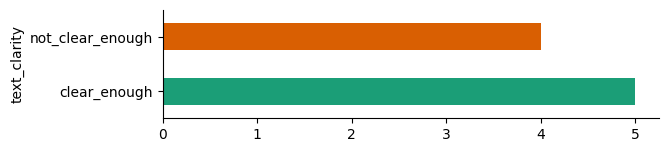

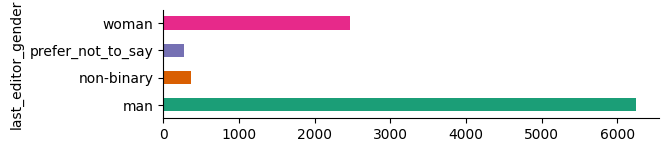

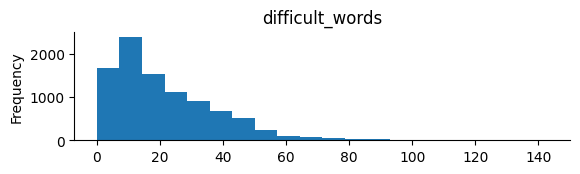

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.subplot(3,1,1)
df.groupby('text_clarity').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()
plt.subplot(3,1,2,)
df.groupby('last_editor_gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()
plt.subplot(3,1,3)
df['difficult_words'].plot(kind='hist', bins=20, title='difficult_words')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

In [ ]:
df.isna().sum()

par_id                   0
paragraph                0
has_entity               0
lexicon_count            0
difficult_words         18
last_editor_gender       0
category                61
text_clarity          9338
dtype: int64

We need  to fill null for  our target  `cartegory` to avoid  issues with training  our  model.

In [ ]:
df.dropna(subset=["category"], inplace=True)

In [ ]:
df["par_id"].duplicated().sum()

6157

In [ ]:
df.nunique()

par_id                3129
paragraph             8992
has_entity               9
lexicon_count          348
difficult_words        113
last_editor_gender       4
category                10
text_clarity             2
dtype: int64

From the  total unique values  in the  columns, we  find  that  the  column `paragraph`  is suitable  to drop the  duplicated data  

In [ ]:
df["paragraph"].duplicated().sum()

294

In [ ]:
df.drop_duplicates(subset = ["paragraph"], inplace= True, keep="first")

In [ ]:
df["paragraph"].duplicated().sum()

0

In [ ]:
print(df["category"].unique())
len(df["category"].unique())

['biographies' 'artificial intelligence' 'programming' 'philosophy'
 'movies about artificial intelligence' 'Philosophy' 'Programming'
 'Artificial intelligence' 'Biographies'
 'Movies about artificial intelligence']


10

In [ ]:
sns.barplot(pd.get_dummies(df["category"]))
plt.xticks(rotation=45)
plt.show()
#px.bar(pd.get_dummies(df["category"]))

From the  target labels  we  need  to  normalise  the  column to get our  labels to be  normal as 5

Cleaning  the  data  by converting the  text in to lower case (Normalising  the  data)

In [ ]:
df["category"] =df["category"].str.lower()
df["paragraph"] =df["paragraph"].str.lower()
df["has_entity"] = df["has_entity"].str.lower()

In [7]:
sns.barplot(pd.get_dummies(df["category"]))
plt.xticks(rotation=45)
plt.show()
#px.bar(pd.get_dummies(df["category"]))

NameError: name 'sns' is not defined

From the  visual we  can see  that, biographies are  the  most occuring.

In [ ]:
df["has_entity"].unique()

array(['org_yes_product_no_person_yes_', 'org_yes_product_no_person_no_',
       'org_no_product_yes_person_no_', 'org_yes_product_yes_person_yes_',
       'org_no_product_no_person_no_', 'org_no_product_yes_person_yes_',
       'org_no_product_no_person_yes_', 'org_yes_product_yes_person_no_',
       'data missing'], dtype=object)

preparing  training  and  testing  data, to train our model with features `paragraph` and  `has_entity`
target variable  `category`

## 3. Data  splitting and  cleaning

In [ ]:
from sklearn.model_selection import train_test_split

X = df['paragraph'] +" " + df['has_entity']
y = df['category']
X_train, X_test , y_train, y_test = train_test_split(X, y , random_state=42,test_size = 0.2, shuffle=True)

We split  our  data  into  training  set  `x_train, y_train` and  `x_test, y_test`.

In [ ]:
X_train =X_train.str.strip().str.replace('[^\w\s]', '').str.lower()
X_test=X_test.str.strip().str.replace('[^\w\s]', '').str.lower()

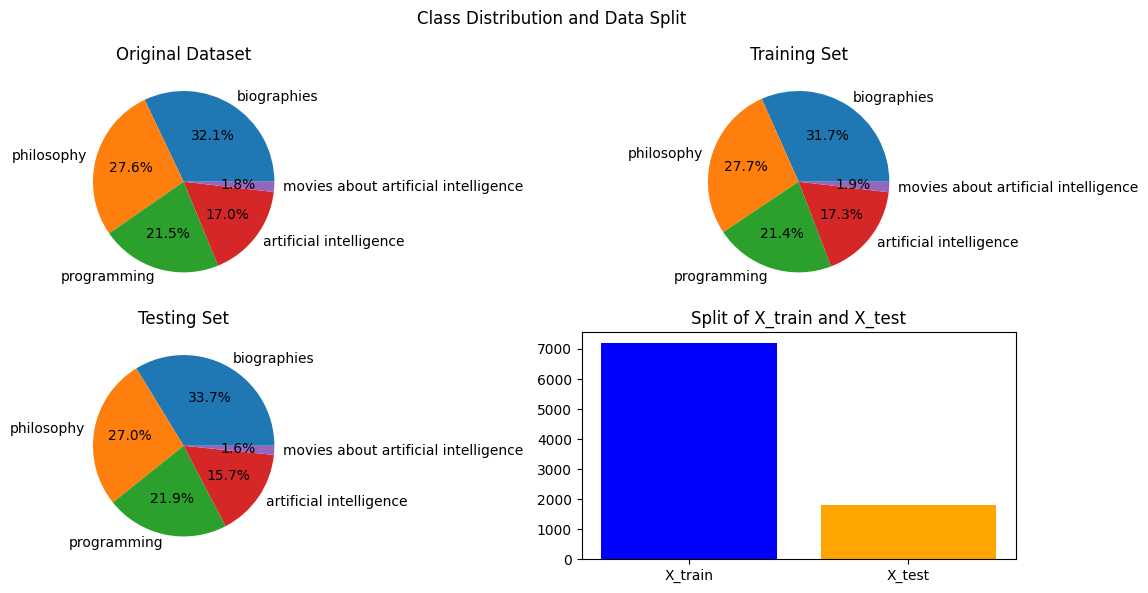

In [ ]:
# Convert y_train and y_test arrays to Pandas Series
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)
# Calculate class distributions
class_distribution_original = y.value_counts(normalize=True)
class_distribution_train = y_train_series.value_counts(normalize=True)
class_distribution_test = y_test_series.value_counts(normalize=True)
# Plot class distributions
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.pie(class_distribution_original, labels=class_distribution_original.index, autopct='%1.1f%%')
plt.title('Original Dataset')

plt.subplot(2, 2, 2)
plt.pie(class_distribution_train, labels=class_distribution_train.index, autopct='%1.1f%%')
plt.title('Training Set')

plt.subplot(2, 2, 3)
plt.pie(class_distribution_test, labels=class_distribution_test.index, autopct='%1.1f%%')
plt.title('Testing Set')

# Plotting split of X_train and X_test
plt.subplot(2, 2, 4)
plt.bar(['X_train', 'X_test'], [len(X_train), len(X_test)], color=['blue', 'orange'])
plt.title('Split of X_train and X_test')

plt.suptitle('Class Distribution and Data Split')
plt.tight_layout()
plt.show()




*   Pie charts show the genre split in original data (left) and training data (right).
*    Colors representing the different genres,the bar graph confirms the training data and reflects the original data's distribution.

  



In [ ]:
X_train

3930    it has also been suggested that edgar allan po...
2119    important philosophers who developed natural l...
437     anderson arranged for david sherwin to write a...
4122    machine learning programs can do things that i...
6168    programming languages are grouped by paradigms...
                              ...                        
5903    major branches of philosophy are epistemology,...
5334    isaac titsingh can be described as being the o...
5540    " blake regards the tour as one of the formati...
866     evolution as a process with hardy a. c. and fo...
7516    hawking had a motor neurone disease, and becau...
Length: 7193, dtype: object

Getting  the  number of  our  classes on the  target variable

In [ ]:
num_classes = len(np.unique(y))
print("target Category classes {}".format(num_classes))

target Category classes 5


Our  target classes  for  prediction are  `5`

with their  corresponding  names, and  label number  assigned.

# 4. Data  encoding

Convert  variables  to categorical in a  format   our   machine  learning  model will ```"understand"```.

In [ ]:
from sklearn.preprocessing import  LabelEncoder
clf = LabelEncoder()
y_train = clf.fit_transform(y_train)
y_test = clf.transform(y_test)

Converting  the  dataset to numeric for  our  model to train on.
Label encoder  is  choosen to convert  our  data  to corresponding  classes  with each class  assigned a  number, from `0` to `4`
converted  the  entity to numeric.

## 5. Model  building

Vectorizing  our  data, to prepare  it  for  training

In [ ]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

Train the  model with our  data

In [ ]:
from sklearn.naive_bayes import  MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred = model.predict(X_test)

# Models valuation and  Metrics


#### Some of these are restricted to the binary classification case:

- [x] `confusion_matrix(y_true, y_pred[, labels])` : Compute confusion matrix to evaluate the accuracy of a classification
- [ ] `hinge_loss(y_true, pred_decision[, labels, ...])`	Average hinge loss (non-regularized)
#### Some also work in the multilabel case:

- [x]  `accuracy_score(y_true, y_pred[, normalize, ...])` 	Accuracy classification score.
- [x] `classification_report(y_true, y_pred[, ...])`	Build a text report showing the main classification metrics
- [ ] `f1_score(y_true, y_pred[, labels, ...])`	Compute the F1 score, also known as balanced F-score or F-measure

# Key Concepts in Model Evaluation
Now that we have a clear overview of the importance of model evaluation, let’s delve into some key concepts that will help you better understand the evaluation process.

##  Overfitting and Underfitting
One of the fundamental concepts in model evaluation is the tradeoff between overfitting and underfitting. Overfitting occurs when a model learns the training data too well, making it overly complex and unable to generalize to unseen examples. On the other hand, underfitting happens when a model is too simple and fails to capture the underlying patterns in the data. Balancing these two extremes is crucial in building models that have good predictive performance on unseen data.

## Bias-Variance Tradeoff
The bias-variance tradeoff is another important consideration in model evaluation. Bias refers to the simplifying assumptions a model makes about the relationship between the input features and the target variable. Variance, on the other hand, refers to the sensitivity of the model to variations in the training data. Finding the right balance between bias and variance is key to achieving optimal model performance.

## Generalization and Validation
Generalization is the ability of a model to perform well on unseen data. It is a crucial aspect of model evaluation because it determines how well our models will perform in real-world scenarios. Validation, on the other hand, involves assessing the performance of a model on a separate validation dataset, which consists of examples that were not used during training. This allows us to estimate how well the model will generalize to new, unseen examples.

## Different Types of Model Evaluation Techniques
Now that we have a solid understanding of the key concepts, let’s explore different techniques for evaluating machine learning models.

## Holdout Method
The holdout method, also known as the train-test split, is one of the simplest model evaluation techniques. It involves splitting the available data into two parts: a training set and a test set. The model is trained on the training set and then evaluated on the test set. This allows us to estimate the model’s performance on unseen data.

## Cross-Validation
Cross-validation is a more robust model evaluation technique that overcomes the limitations of the holdout method. It involves dividing the data into multiple subsets or “folds.” The model is trained on a combination of these folds and evaluated on the remaining fold. By repeating this process with different combinations of folds, we can obtain a more reliable estimate of the model’s performance.



The accuracy_score function computes the accuracy, either the fraction (default) or the count (normalize=False) of correct predictions.

In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

If $$\hat{y}_i $$ is the predicted value of the i-th sample and $$y_i$$ is the corresponding true value, then the fraction of correct predictions over $$n_\text{samples}$$ is defined as

$$ \texttt{accuracy}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples}-1} 1(\hat{y}_i = y_i) $$ where $$1(x)$$ is the

## 1. Accuracy
Accuracy is used to measure the performance of the model. It is the ratio of Total correct instances to the total instances. 

$$ Accuracy= 
TP+TN+FP+FN
TP+TN $$
## 2. Precision
Precision is a measure of how accurate a model’s positive predictions are. It is defined as the ratio of true positive predictions to the total number of positive predictions made by the model.
$$Precision= 
TP+FP
TP$$
## 3. Recall
Recall measures the effectiveness of a classification model in identifying all relevant instances from a dataset. It is the ratio of the number of true positive (TP) instances to the sum of true positive and false negative (FN) instances.
$$Recall= 
TP+FN
TP$$
Note: We use precision when we want to minimize false positives, crucial in scenarios like spam email detection where misclassifying a non-spam message as spam is costly. And we use recall when minimizing false negatives is essential, as in medical diagnoses, where identifying all actual positive cases is critical, even if it results in some false positives.

## 4. F1-Score
F1-score is used to evaluate the overall performance of a classification model. It is the harmonic mean of precision and recall,

$$ F1-Score= 
Precision+Recall$$
## 2⋅Precision⋅Recall

We balance precision and recall with the F1-score when a trade-off between minimizing false positives and false negatives is necessary, such as in information retrieval systems.

## 5. Specificity:
Specificity is another important metric in the evaluation of classification models, particularly in binary classification. It measures the ability of a model to correctly identify negative instances. Specificity is also known as the True Negative Rate.

Specificity

$$Specificity= 
TN+FP
TN $$

### Classification Report
The classification_report function builds a text report showing the main classification metrics.

Intuitively, <strong> precision</strong> is the ability of the classifier not to label as positive a sample that is negative, <br>and <strong>recall</strong> is the ability of the classifier to find all the positive samples.

The <strong>F-measure</strong> ($$F_\beta$$ and $$F_1$$ measures) can be interpreted as a weighted harmonic mean of the precision and recall. A $$F_\beta$$ measure reaches its best value at 1 and its worst score at 0. With $$\beta = 1, F_\beta and F_1$$ are equivalent, and the recall and the precision are equally important.



In [ ]:
from sklearn.metrics  import  accuracy_score, multilabel_confusion_matrix
print("Models  accuracy {:.2f}".format(accuracy_score(y_pred =y_pred, y_true= y_test)))

Models  accuracy 0.88


#### What is a Confusion Matrix?
A `confusion matrix` is a matrix that summarizes the performance of a machine learning model on a set of test data. It is a means of displaying the number of accurate and inaccurate instances based on the model’s predictions. It is often used to measure the performance of classification models, which aim to predict a categorical label for each input instance.

The matrix displays the number of instances produced by the model on the test data.

- `True positives (TP)`: occur when the model accurately predicts a positive data point.
- `True negatives (TN)`: occur when the model accurately predicts a negative data point.
- `False positives (FP)`: occur when the model predicts a positive data point incorrectly.
- `False negatives (FN)`: occur when the model mispredicts a negative data point.
Why do we need a Confusion Matrix?
When assessing a classification model’s performance, a confusion matrix is essential. It offers a thorough analysis of true positive, true negative, false positive, and false negative predictions, facilitating a more profound comprehension of a model’s recall, accuracy, precision, and overall effectiveness in class distinction. When there is an uneven class distribution in a dataset, this matrix is especially helpful in evaluating a model’s performance beyond basic accuracy metrics.



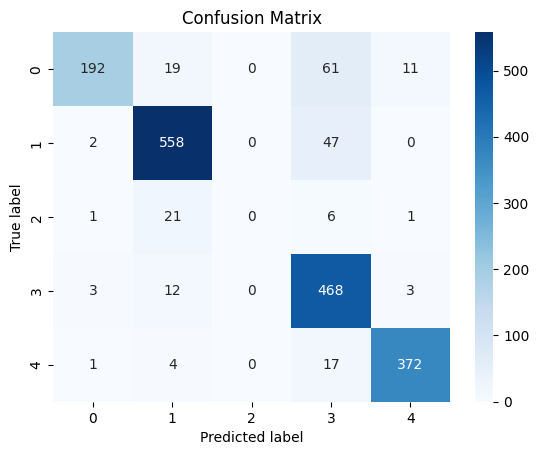

In [ ]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()


From the  confusion matrix  heatmap, we  can see  the  model performs  poorly  in predicting the movies about artificial intelligence

What is a classification report?

As the name suggests, it is the report which explains everything about the classification. This is the summary of the quality of classification made by the constructed ML model. It comprises mainly 5 columns and (N+3) rows. The first column is the class label’s name and followed by Precision, Recall, F1-score, and Support. N rows are for N class labels and other three rows are for accuracy, macro average, and weighted average. 

- `Precision` : It is calculated with respect to the predicted values. For class-A, out of total predictions how many were really belong to class-A in actual dataset, is defined as the precision. It is the ratio of [i][i] cell of confusion matrix and sum of the [i] column.

- `Recall`: It is calculated with respect to the actual values in dataset. For class-A, out of total entries in dataset, how many were actually classified in class-A by the ML model, is defined as the recall. It is the ratio of [i][i] cell of confusion matrix and sum of the [i] row.

- `F1-score` : It is the harmonic mean of precision and recall.
For example, to calculate the harmonic mean, you would divide the number of observations by the reciprocal of each number. 
- `Support` : It is the total entries of each class in the actual dataset. It is simply the sum of rows for every class-i.



In [ ]:
from sklearn import metrics
report  = metrics.classification_report(y_true = y_test, y_pred = y_pred)

C:\Users\XPERT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\XPERT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\XPERT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificati

In [ ]:
report_df = pd.DataFrame(metrics.classification_report(y_true = y_test, y_pred = y_pred, output_dict=True)).transpose()
report = report_df.transpose()
report

C:\Users\XPERT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\XPERT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\XPERT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificati

,0,1,2,3,4,accuracy,macro avg,weighted avg
precision,0.964824,0.908795,0.0,0.781302,0.961240,0.883824,0.723232,0.880003
recall,0.678445,0.919275,0.0,0.962963,0.944162,0.883824,0.700969,0.883824
f1-score,0.796680,0.914005,0.0,0.862673,0.952625,0.883824,0.705197,0.875406
support,283.000000,607.000000,29.0,486.000000,394.000000,0.883824,1799.000000,1799.000000


In [ ]:
info = pd.DataFrame(report.values, columns=['artificial intelligence','biographies', 'movies about artificial intelligence','philosophy', 'programming',"accuracy","macro avg","weighted avg"])
info.index = ['precision', 'recall', 'f1-score', 'support']
info

,artificial intelligence,biographies,movies about artificial intelligence,philosophy,programming,accuracy,macro avg,weighted avg
precision,0.964824,0.908795,0.0,0.781302,0.961240,0.883824,0.723232,0.880003
recall,0.678445,0.919275,0.0,0.962963,0.944162,0.883824,0.700969,0.883824
f1-score,0.796680,0.914005,0.0,0.862673,0.952625,0.883824,0.705197,0.875406
support,283.000000,607.000000,29.0,486.000000,394.000000,0.883824,1799.000000,1799.000000


2. 5. Task 2: text clarity classification prototype.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import  SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
labeled_data = df[~df['text_clarity'].isnull()]
unlabeled_data = df[df['text_clarity'].isnull()]
X_labeled = labeled_data['paragraph']
y_labeled = labeled_data['text_clarity']

Looking at the `labeled_data` and `unlabeled_data ` data distribution

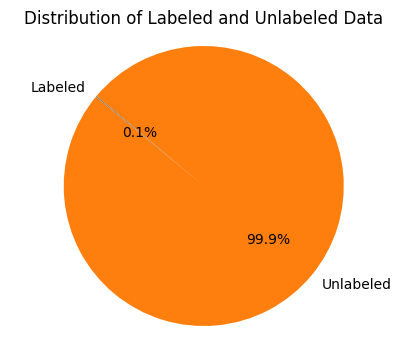

In [ ]:
labeled_count = len(labeled_data)
unlabeled_count = len(unlabeled_data)
plt.figure(figsize=(5, 4))
plt.pie([labeled_count, unlabeled_count], labels=['Labeled', 'Unlabeled'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Labeled and Unlabeled Data')
plt.axis('equal')
plt.show()


### Split and  vectorize  our  text


In [ ]:
vectorizer = TfidfVectorizer()
X_labeled_vec = vectorizer.fit_transform(X_labeled)
X_train, X_test, y_train, y_test = train_test_split(X_labeled_vec, y_labeled, test_size=0.2, random_state=42, stratify=y_labeled)

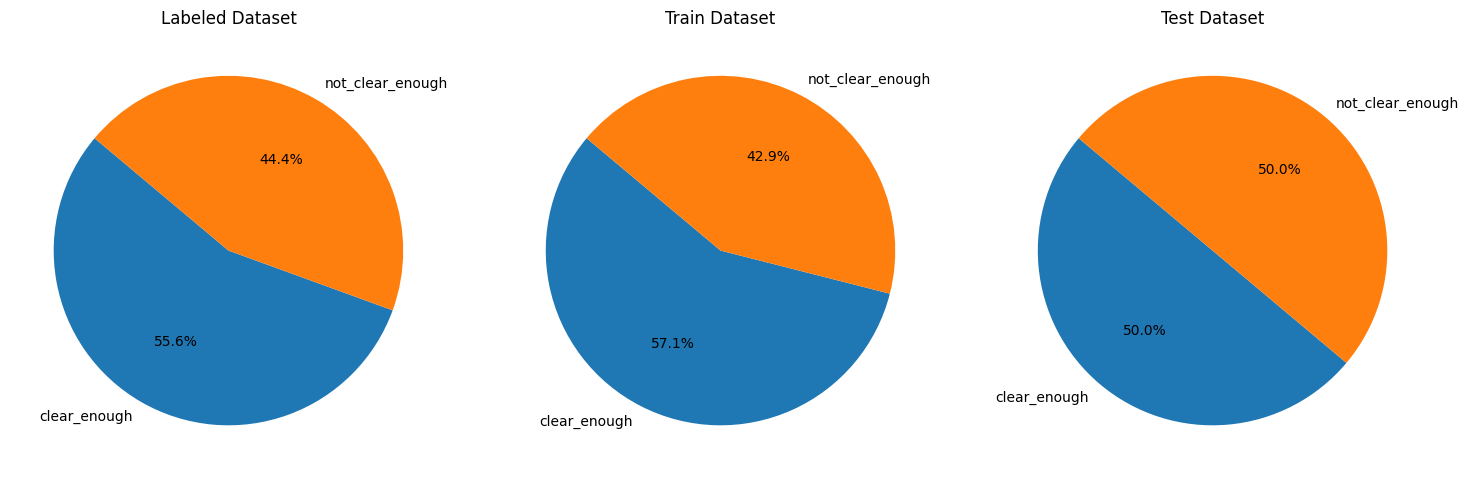

In [ ]:

# Calculate class distributions
class_distribution_labeled = {label: count/len(y_labeled) for label, count in zip(*np.unique(y_labeled, return_counts=True))}
class_distribution_train = {label: count/len(y_train) for label, count in zip(*np.unique(y_train, return_counts=True))}
class_distribution_test = {label: count/len(y_test) for label, count in zip(*np.unique(y_test, return_counts=True))}
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
# Pie chart for labeled dataset
ax[0].pie(class_distribution_labeled.values(), labels=class_distribution_labeled.keys(), autopct='%1.1f%%', startangle=140)
ax[0].set_title('Labeled Dataset')
# Pie chart for train dataset
ax[1].pie(class_distribution_train.values(), labels=class_distribution_train.keys(), autopct='%1.1f%%', startangle=140)
ax[1].set_title('Train Dataset')
# Pie chart for test dataset
ax[2].pie(class_distribution_test.values(), labels=class_distribution_test.keys(), autopct='%1.1f%%', startangle=140)
ax[2].set_title('Test Dataset')

plt.tight_layout()
plt.show()


In [ ]:

from sklearn.preprocessing import LabelBinarizer
bin = LabelBinarizer()
y_train = bin.fit_transform(y_train)
y_test = bin.transform(y_test)

### Model Building

In [ ]:
clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
unlabeled_pool = unlabeled_data['paragraph']
unlabeled_pool_vec = vectorizer.transform(unlabeled_pool)

C:\Users\XPERT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicting  our  training  set.

In [ ]:
unlabeled_preds = clf.predict(unlabeled_pool_vec)

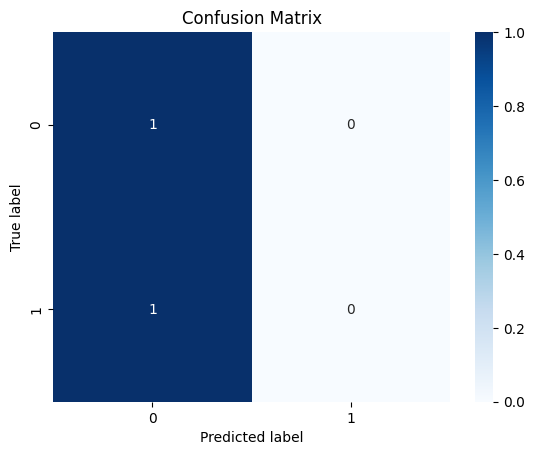

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()


Our  model detected  all features belonging  to  clear_enough

In [ ]:
from sklearn import metrics
report  = metrics.classification_report(y_true = y_test, y_pred = y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



C:\Users\XPERT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\XPERT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\XPERT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificati

Appending  our  predicted, predicted  to the  unlabeled  data.

In [ ]:
unlabeled_data["text_clarity"] = unlabeled_preds

C:\Users\XPERT\AppData\Local\Temp\ipykernel_8060\2312487646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unlabeled_data["text_clarity"] = unlabeled_preds


Combining  our  datasets

In [ ]:
combined_data = pd.concat([labeled_data, unlabeled_data], ignore_index=True)

In [ ]:
combined_data

,par_id,paragraph,has_entity,lexicon_count,difficult_words,last_editor_gender,category,text_clarity
0,4.282090e+11,ramsay was born in glasgow on 2 october 1852. ...,org_yes_product_no_person_yes_,49,12.0,man,biographies,clear_enough
1,5.642180e+11,it has been widely estimated for at least the ...,org_yes_product_no_person_no_,166,47.0,man,artificial intelligence,not_clear_enough
2,2.914010e+11,he went on to win the royal medal of the royal...,org_yes_product_no_person_no_,69,18.0,non-binary,biographies,clear_enough
3,3.154800e+10,the changes have altered many underlying assum...,org_no_product_yes_person_no_,76,27.0,non-binary,programming,clear_enough
4,5.063401e+10,"after these novels were published, disraeli de...",org_yes_product_yes_person_yes_,200,47.0,man,biographies,not_clear_enough
...,...,...,...,...,...,...,...,...
8987,2.005230e+11,sir joseph dalton hooker was a british botani...,org_yes_product_no_person_yes_,54,16.0,man,biographies,0
8988,5.063401e+10,as successful invasions of india generally cam...,org_yes_product_no_person_yes_,217,46.0,woman,biographies,0
8989,6.437004e+09,hawking was born on 8 january 1942 in oxford t...,org_yes_product_no_person_yes_,91,27.0,woman,biographies,0
8990,7.252590e+11,more complex tasks can be making custom data e...,org_yes_product_no_person_no_,47,15.0,man,programming,0
